In [13]:
import pandas as pd
import numpy as np
from pythainlp.tokenize import word_tokenize
from pythainlp.corpus import thai_stopwords
from wordcloud import WordCloud
import re
import statistics
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('dataset/DatasetLegal.csv')
str_answer = data['answer'].astype(str)
str_answer = str_answer.map(lambda x: re.sub('[,.!?*#/]', '', x))
str_question = data['question'].astype(str)
str_question = str_question.map(lambda x: re.sub('[,.!?*#/]', '', x))

sentense_token_question = []
sentense_token_answer = []
for i in range(len(str_answer)):
  sentense_token_question.append(str_question[i])
  sentense_token_answer.append(str_answer[i])

word_token_answer = []
word_token_question = []
for sentense in sentense_token_question:
  word = word_tokenize(sentense, engine='newmm')
  word_token_question.append(word)

for sentense in sentense_token_answer:
  word = word_tokenize(sentense, engine='newmm')
  word_token_answer.append(word)

In [34]:
list_question = [word for sentense in word_token_question for word in sentense]
list_answer = [word for sentense in word_token_answer for word in sentense]
unique_word_question = set(list_question)
unique_word_answer = set(list_answer)
print(f"unique word (question): {len(unique_word_question)}\nunique word (answer): {len(unique_word_answer)}")

unique word (question): 14243
unique word (answer): 11253


In [35]:
common_words = unique_word_question.intersection(unique_word_answer)
num_common_words = len(common_words)
print(f"number of common words: {num_common_words}")

number of common words: 7976


In [5]:
num_words_question = []
num_words_answer = []
for num in range(len(word_token_question)):
  num_words_question.append(len(word_token_question[num]))
print(num_words_question)

for num in range(len(word_token_answer)):
  num_words_answer.append(len(word_token_answer[num]))
print(num_words_answer)

[176, 79, 285, 82, 138, 58, 100, 125, 191, 247, 40, 22, 16, 93, 113, 75, 85, 133, 34, 82, 97, 125, 45, 186, 190, 29, 122, 93, 46, 83, 72, 148, 37, 71, 27, 27, 31, 76, 88, 73, 60, 49, 54, 31, 117, 30, 26, 291, 31, 31, 72, 83, 157, 108, 36, 37, 71, 67, 33, 51, 64, 75, 120, 34, 71, 32, 69, 99, 32, 37, 47, 58, 72, 26, 26, 39, 39, 53, 119, 32, 51, 79, 243, 38, 162, 384, 155, 30, 138, 44, 76, 168, 83, 37, 180, 39, 36, 153, 29, 96, 77, 31, 11, 38, 218, 36, 47, 25, 192, 78, 85, 45, 101, 12, 61, 49, 47, 58, 66, 61, 131, 59, 48, 89, 65, 16, 13, 38, 30, 31, 80, 43, 67, 35, 16, 9, 79, 185, 187, 141, 75, 175, 52, 214, 63, 143, 28, 364, 823, 289, 180, 138, 89, 41, 68, 132, 128, 212, 188, 52, 66, 660, 86, 289, 315, 130, 111, 493, 93, 404, 36, 71, 47, 178, 405, 49, 149, 144, 172, 369, 83, 292, 676, 257, 116, 15, 118, 191, 32, 113, 34, 236, 81, 143, 46, 83, 122, 151, 256, 50, 159, 331, 301, 260, 453, 109, 51, 95, 35, 16, 43, 129, 57, 17, 128, 43, 44, 35, 55, 189, 64, 84, 22, 84, 30, 15, 8, 65, 16, 17, 

In [10]:
question_len_average = statistics.mean(num_words_question)
print(f"average number of word in each document (question data): {question_len_average} words")

answer_len_average = statistics.mean(num_words_answer)
print(f"average number of word in each document (answer data): {answer_len_average} words")

average number of word in each document (question data): 124.62508889204949 words
average number of word in each document (answer data): 106.23225714692077 words


In [11]:
print(f"median (question): {statistics.median(num_words_question)}")
print(f"median (answer): {statistics.median(num_words_answer)}")

median (question): 89
median (answer): 79


In [12]:
print(f"mode (question): {statistics.mode(num_words_question)}")
print(f"mode (answer): {statistics.mode(num_words_answer)}")

mode (question): 53
mode (answer): 50


In [20]:
print(f"max (question): {max(num_words_question)}\nmin (question): {min(num_words_question)}")
print(f"max (answer): {max(num_words_answer)}\nmin (answer): {min(num_words_answer)}")

max (question): 3539
min (question): 1
max (answer): 2669
min (answer): 1


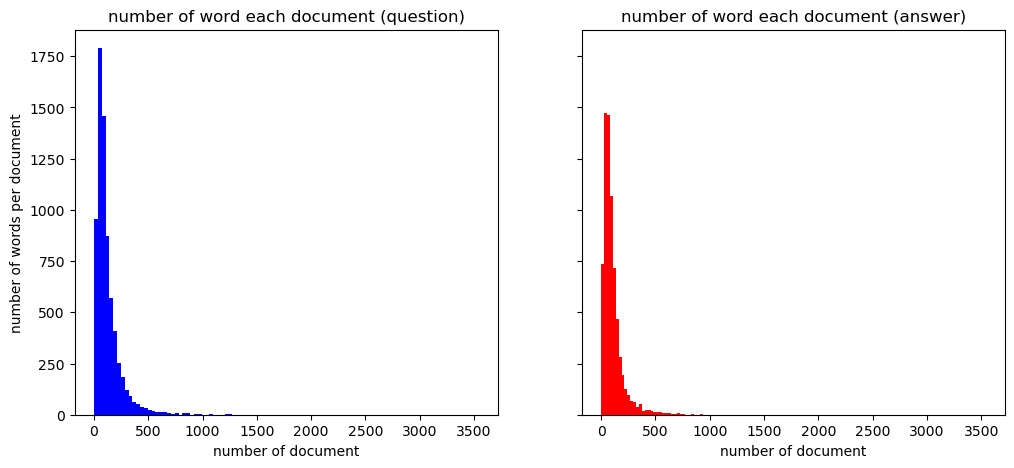

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)
x1 = num_words_question
x2 = num_words_answer
# Plot histograms
ax1.hist(x1, bins=100, color='blue')
ax1.set_title('number of word each document (question)')
ax2.hist(x2, bins=100, color='red')
ax2.set_title('number of word each document (answer)')

# Add axis labels and title to the figure
ax1.set_xlabel('number of document')
ax1.set_ylabel('number of words per document')
ax2.set_xlabel('number of document')

# Show the figure
plt.show()